In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly .express as px

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import warnings
warnings.filterwarnings("ignore")

import requests
import json

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from joblib import dump, load

In [2]:
df = pd.read_csv("demanda_comunidades.csv")
df = df.iloc[:148]
df["Fecha"] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df = df.set_index("Fecha")
df = df.resample("M").sum()
df

,Andalucia,Aragon,Cantabria,Castilla-La Mancha,Castilla-Leon,Cataluña,Pais Vasco,Asturias,Ceuta,Melilla,Madrid,Navarra,Valencia,Extremadura,Galicia,Baleares,Canarias,La Rioja,Murcia
Fecha,,,,,,,,,,,,,,,,,,,
2011-01-31,3611.37,956.50,394.46,1151.08,1308.02,4342.58,1653.04,1020.15,16.75,18.09,2989.14,442.76,2526.98,462.01,1856.31,477.26,744.52,163.77,731.16
2011-02-28,3206.56,872.53,366.57,1039.33,1189.42,3908.14,1590.31,920.40,15.25,16.47,2693.27,419.33,2271.57,407.24,1674.72,430.51,668.99,151.47,652.48
2011-03-31,3363.76,942.54,402.78,1092.29,1264.48,4218.75,1742.78,986.15,16.43,17.21,2819.43,453.44,2373.75,437.54,1789.36,454.44,736.78,162.84,685.60
2011-04-30,2902.82,825.73,361.94,895.00,1039.44,3592.54,1442.49,881.85,14.97,15.69,2245.19,378.08,1961.97,353.80,1583.51,393.42,697.16,130.21,592.38
2011-05-31,2988.73,874.73,379.05,942.66,1106.83,3886.56,1545.96,910.10,16.13,16.93,2372.78,415.01,2095.02,368.54,1613.76,454.31,717.47,141.86,627.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,3132.50,828.64,276.51,949.28,1106.77,3656.24,1200.91,742.44,15.73,15.19,2358.77,389.30,2111.55,371.76,1175.42,398.30,718.90,129.65,705.19
2023-01-31,3520.36,758.75,313.58,1057.79,1243.04,3413.48,1412.09,760.77,16.64,16.26,2751.79,435.96,2458.85,459.70,1261.73,450.22,719.36,146.98,781.19
2023-02-28,3207.26,837.99,297.10,971.25,1120.19,3354.02,1321.85,715.08,15.70,14.90,2384.48,392.97,2338.98,413.03,1084.82,431.86,650.24,131.94,741.17


In [3]:
steps = 12
datos_train =  df[:-steps]
datos_test = df[-steps:]

In [4]:
datos_test

,Andalucia,Aragon,Cantabria,Castilla-La Mancha,Castilla-Leon,Cataluña,Pais Vasco,Asturias,Ceuta,Melilla,Madrid,Navarra,Valencia,Extremadura,Galicia,Baleares,Canarias,La Rioja,Murcia
Fecha,,,,,,,,,,,,,,,,,,,
2022-05-31,3057.82,862.40,332.93,931.90,1094.95,3626.45,1348.28,746.75,16.20,15.61,2142.77,432.30,2113.92,384.16,1170.29,471.93,700.76,129.91,721.90
2022-06-30,3298.55,892.30,304.84,1029.50,1109.22,3825.10,1312.50,712.89,16.61,16.24,2299.05,438.76,2344.92,382.64,1137.85,575.20,693.67,133.78,806.71
2022-07-31,3902.05,909.93,325.89,1194.95,1203.82,4277.63,1279.88,734.21,17.86,19.13,2624.78,401.53,2700.31,461.42,1097.38,702.37,754.31,141.57,886.81
2022-08-31,3714.91,856.44,302.53,1102.87,1123.27,3905.43,994.59,705.36,16.83,20.55,2326.07,402.56,2532.33,480.32,1038.41,728.92,757.17,130.96,872.03
2022-09-30,3146.67,817.50,276.23,935.40,1035.65,3714.42,1226.52,712.57,15.82,17.28,2087.26,416.17,2287.96,377.52,1028.86,594.73,724.22,129.93,764.94
2022-10-31,2966.02,807.91,288.08,854.59,1035.32,3470.26,1278.13,699.04,16.13,15.38,2033.21,411.66,2031.90,370.75,1038.97,466.69,728.55,126.05,691.60
2022-11-30,2817.41,830.54,274.85,867.08,1086.77,3491.68,1280.93,710.84,15.16,14.72,2198.04,426.58,2021.84,360.31,1081.88,362.54,709.23,128.45,672.73
2022-12-31,3132.50,828.64,276.51,949.28,1106.77,3656.24,1200.91,742.44,15.73,15.19,2358.77,389.30,2111.55,371.76,1175.42,398.30,718.90,129.65,705.19
2023-01-31,3520.36,758.75,313.58,1057.79,1243.04,3413.48,1412.09,760.77,16.64,16.26,2751.79,435.96,2458.85,459.70,1261.73,450.22,719.36,146.98,781.19


In [5]:
print(f"Fechas entrenamiento: {datos_train.index.min()} --- {datos_train.index.max()} (n={len(datos_train)})")
print(f"Fechas test: {datos_test.index.min()} --- {datos_test.index.max()} (n={len(datos_test)})")

Fechas entrenamiento: 2011-01-31 00:00:00 --- 2022-04-30 00:00:00 (n=136)
Fechas test: 2022-05-31 00:00:00 --- 2023-04-30 00:00:00 (n=12)


In [6]:
column_dataframes = {}

for comunidad in df.columns:
    column_dataframes[comunidad] = pd.DataFrame({comunidad: df[comunidad]})   

In [7]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(n_estimators=20, random_state=20), lags = 60)

forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(n_estimators=20, random_state=20) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
Transformer for y: None 
Transformer for exog: None 
Window size: 60 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 20, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-09-08 13:12

In [8]:
predicciones = pd.DataFrame()

for comunidad in df.columns:
    train =  column_dataframes[comunidad][:-steps]
    test = column_dataframes[comunidad][-steps:]
    forecaster.fit(y=pd.Series(train.values.flatten()))
    predicciones_comunidad = forecaster.predict(steps=12)
    predicciones[comunidad] = predicciones_comunidad

In [9]:
Fecha = pd.date_range(start = datos_test.index.min(), end = datos_test.index.max(), freq='M')
predicciones.index = Fecha
predicciones.index.name = 'Fecha'
predicciones

,Andalucia,Aragon,Cantabria,Castilla-La Mancha,Castilla-Leon,Cataluña,Pais Vasco,Asturias,Ceuta,Melilla,Madrid,Navarra,Valencia,Extremadura,Galicia,Baleares,Canarias,La Rioja,Murcia
Fecha,,,,,,,,,,,,,,,,,,,
2022-05-31,3043.3420,848.9200,324.1565,955.8155,1100.4340,3751.5885,1355.1905,745.0420,16.0960,15.9355,2072.3130,421.7035,2022.8100,388.3370,1278.7375,475.1530,674.4375,129.9210,716.9025
2022-06-30,3298.1585,864.0585,325.5185,999.3235,1122.4985,3760.0150,1285.3005,736.5965,15.9585,16.9070,2316.4355,416.4530,2246.3730,413.4690,1298.5305,592.0540,658.7015,132.0380,749.1590
2022-07-31,3727.8020,856.2905,326.6810,1118.9835,1176.9450,4046.7390,1299.1205,738.5395,17.5195,19.7020,2436.4280,419.2595,2556.1970,423.9235,1311.7830,619.4395,686.0860,142.8280,903.9475
2022-08-31,3834.9725,853.1595,322.0680,1088.1470,1144.5115,3790.5840,1094.4765,743.1720,17.9910,21.3830,2207.1420,407.1775,2487.5410,494.0505,1325.5090,639.5255,695.3370,130.5715,899.1135
2022-09-30,3181.1690,855.9030,327.9445,947.8215,1091.4205,3749.7380,1280.0795,735.1900,16.8865,18.6045,2146.9630,425.3255,2267.7305,448.9665,1370.1115,575.8045,702.1425,133.5440,752.5295
2022-10-31,3066.0400,839.8560,328.7245,922.3740,1108.4160,3657.7550,1369.2305,750.8510,16.8400,16.7085,2196.4875,421.0735,2080.4530,398.0520,1388.3705,454.7010,716.8705,137.5630,726.7495
2022-11-30,3160.8905,867.5505,323.0420,948.8205,1169.8040,3811.4370,1397.4910,754.0275,16.2185,15.9240,2327.7630,431.2490,2197.3565,419.7715,1436.7540,437.2730,707.2420,138.0885,728.1240
2022-12-31,3420.3580,850.3425,314.6520,1038.3100,1207.0335,3854.7995,1311.6855,769.1465,17.1460,16.8765,2542.6325,411.7015,2277.9775,425.5360,1385.4710,441.7140,725.5965,138.3160,783.3130
2023-01-31,3458.6780,874.5185,310.3070,1051.0535,1236.2480,3973.0765,1431.6035,766.9430,17.5490,18.1885,2667.2855,434.1110,2510.6870,455.0780,1353.2160,423.9265,711.6355,149.3335,806.8440


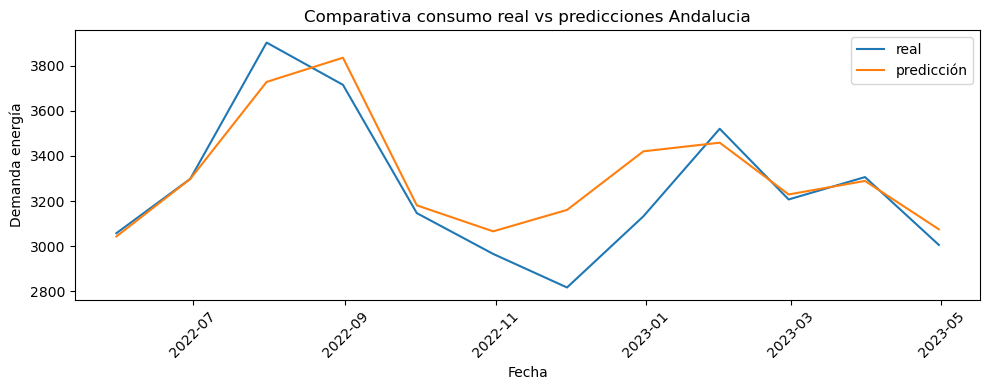

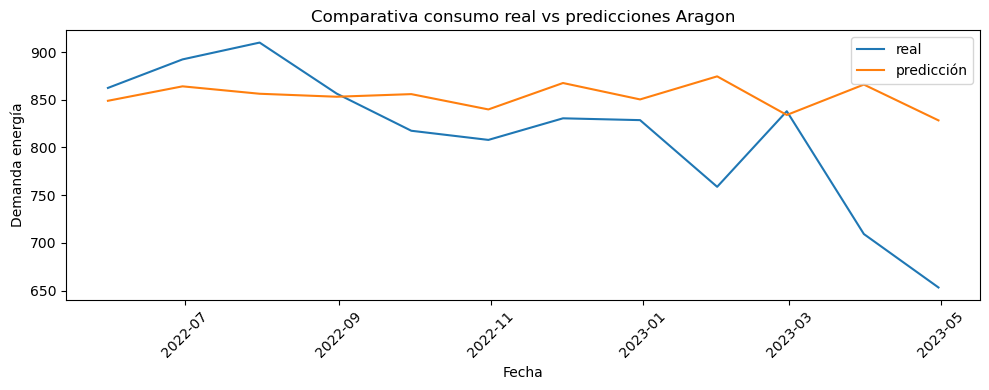

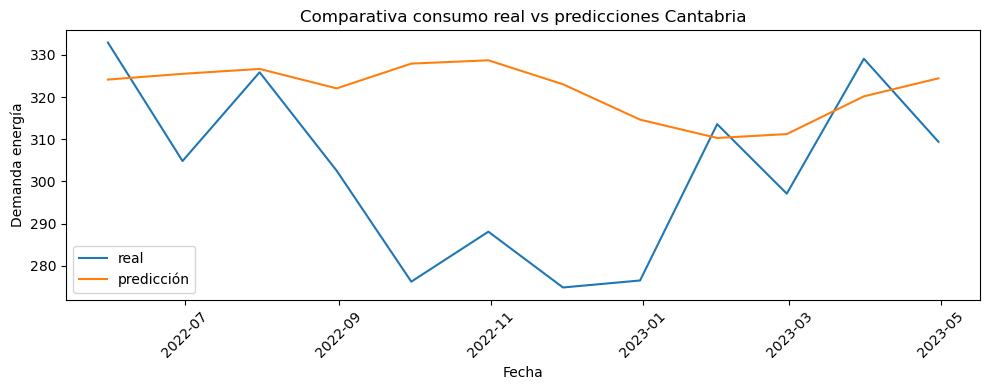

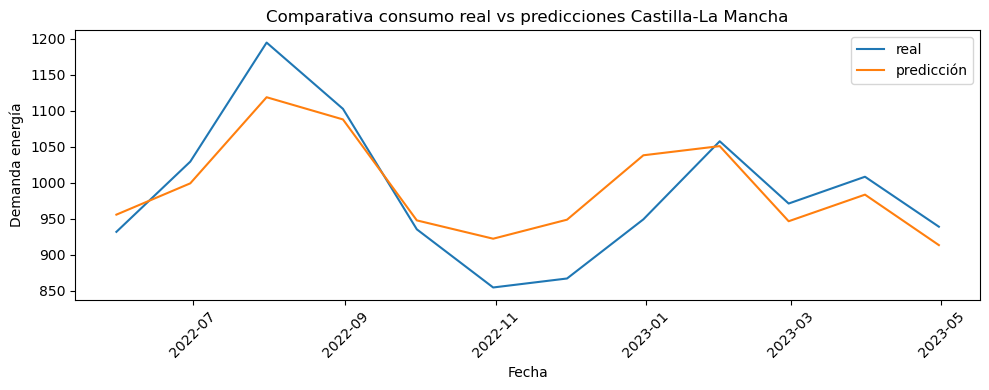

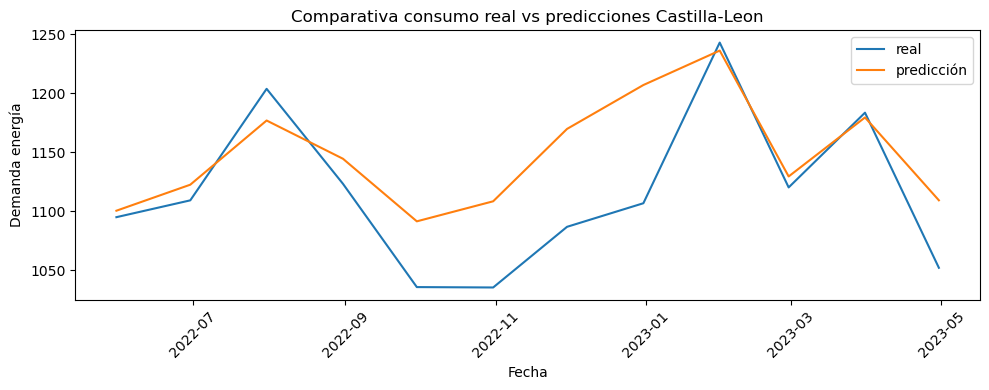

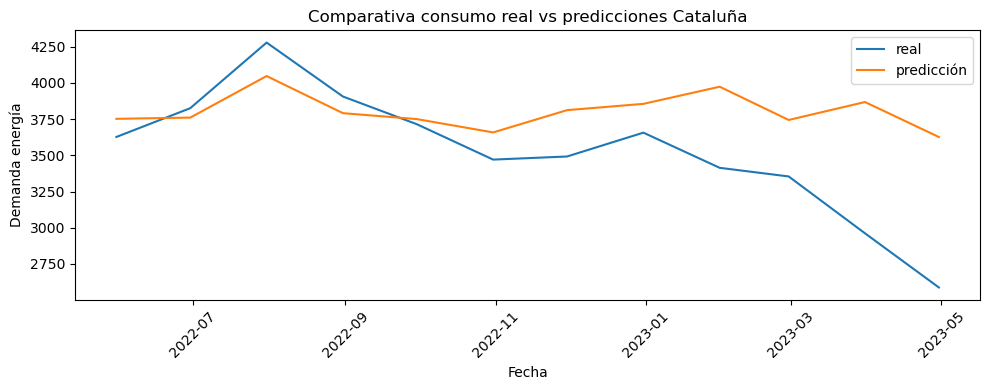

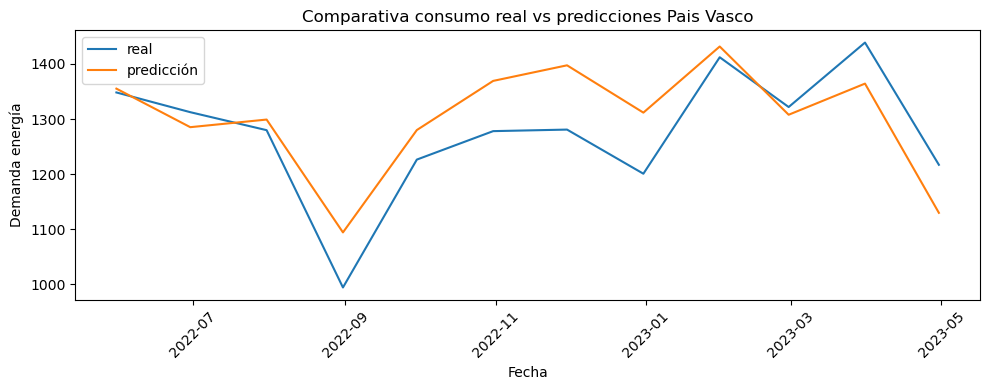

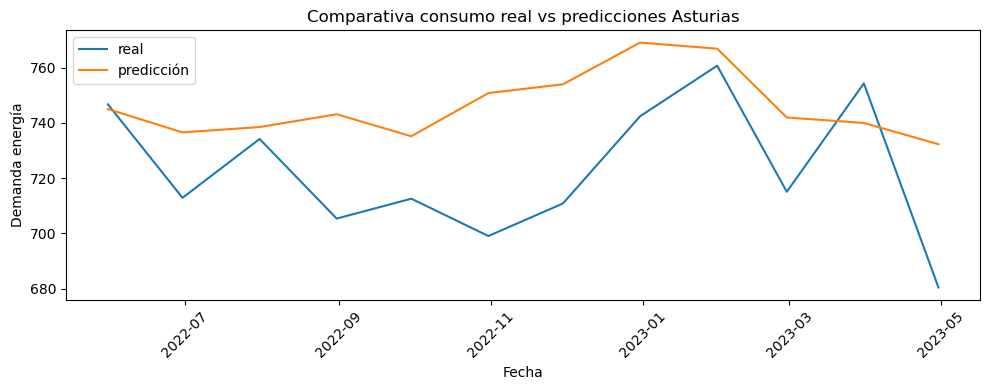

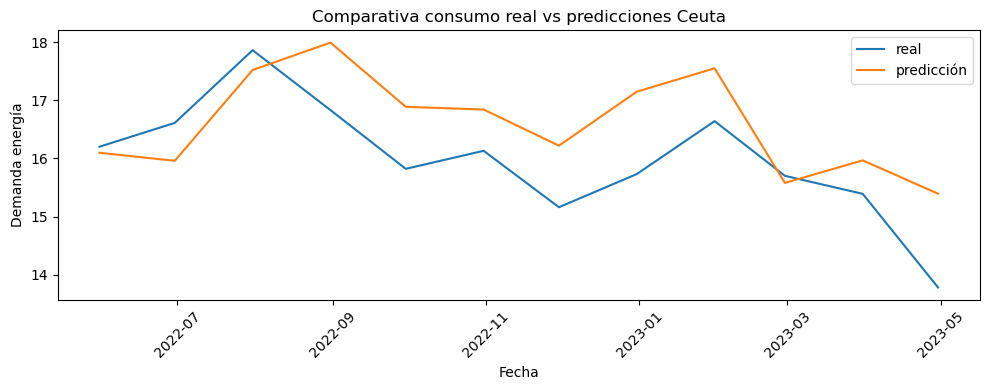

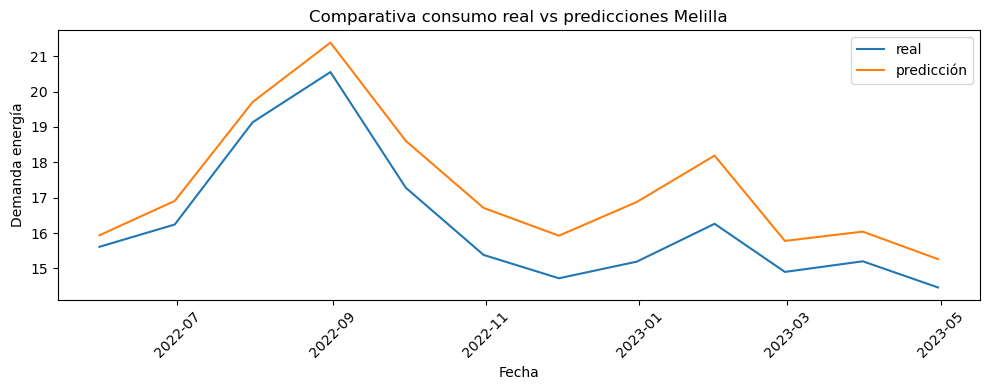

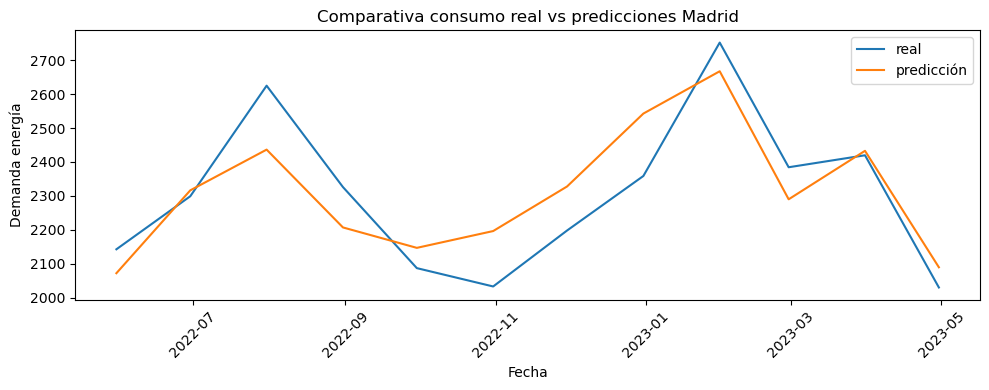

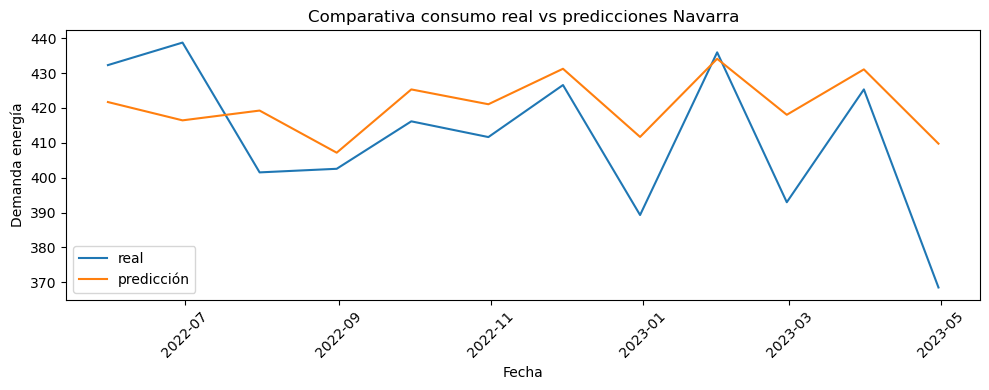

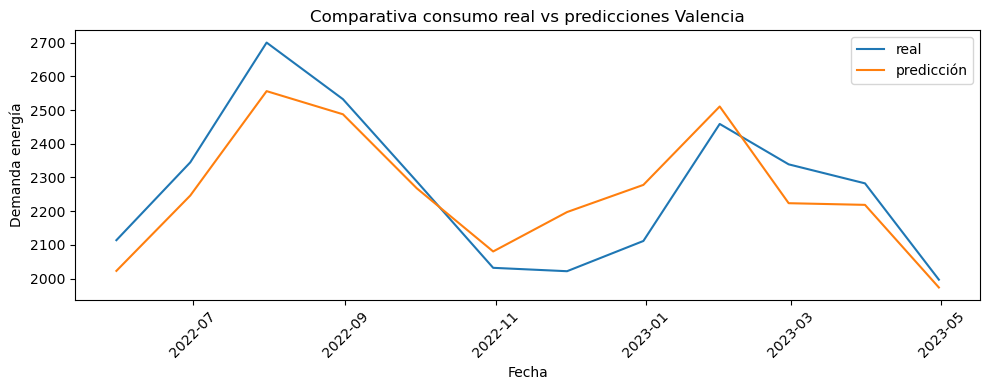

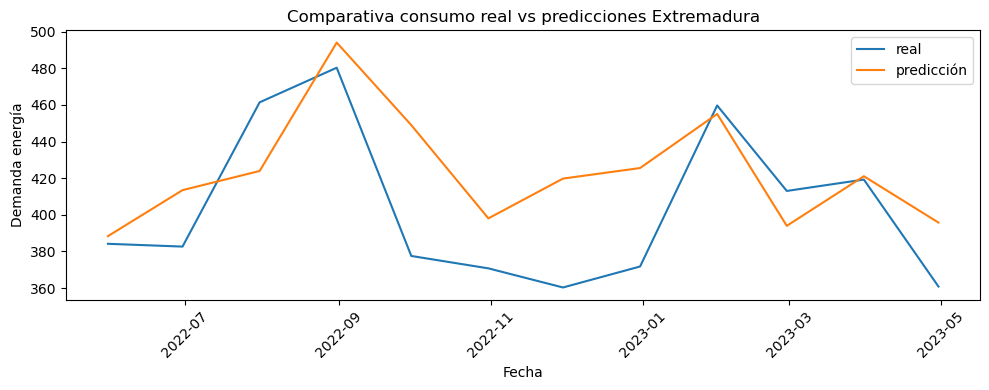

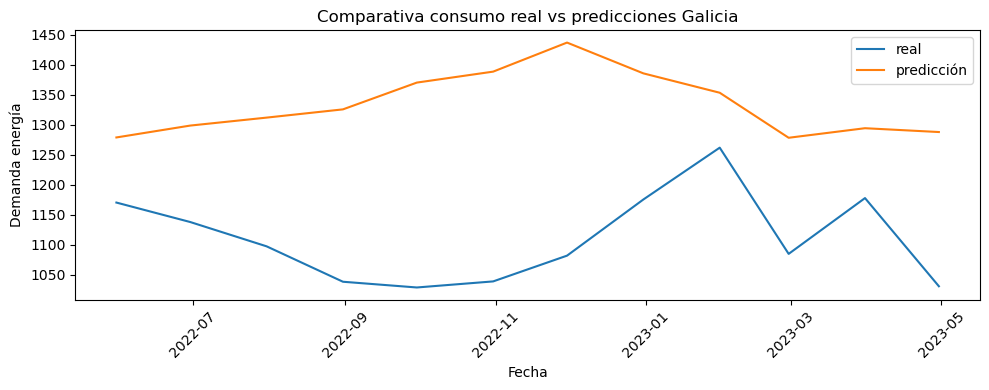

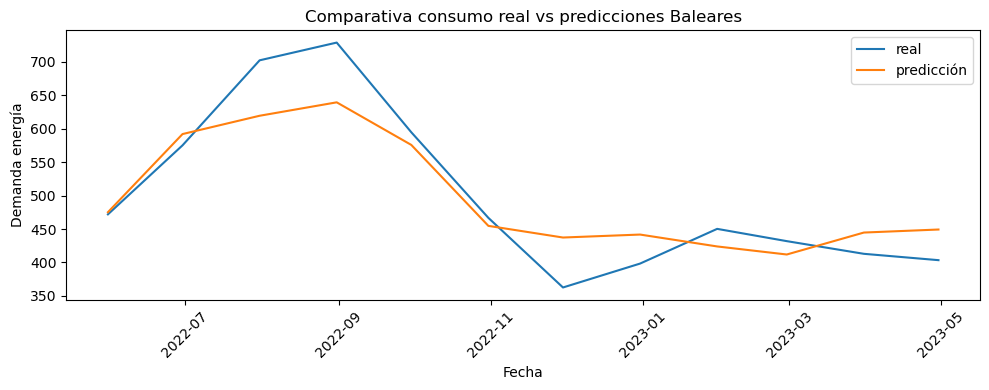

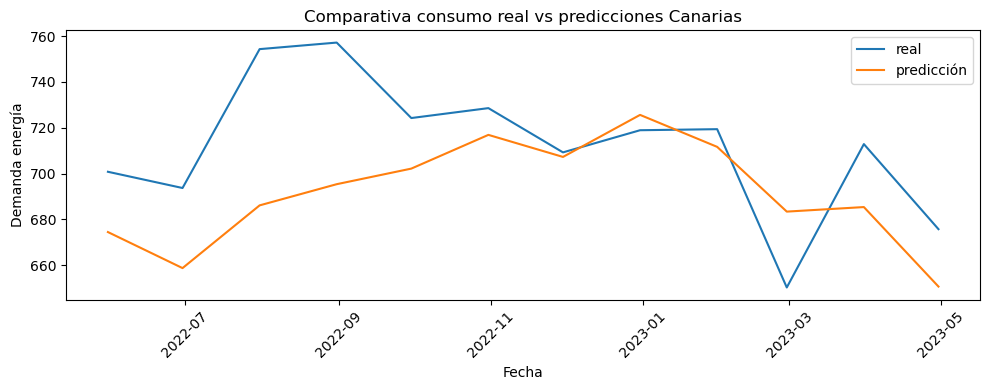

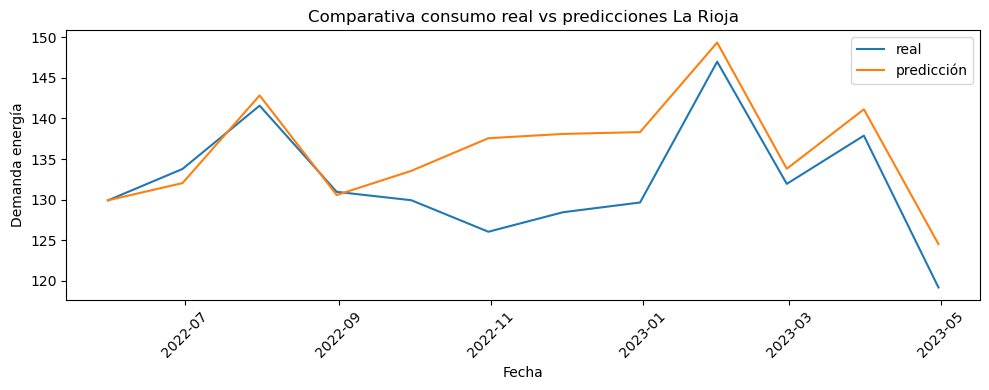

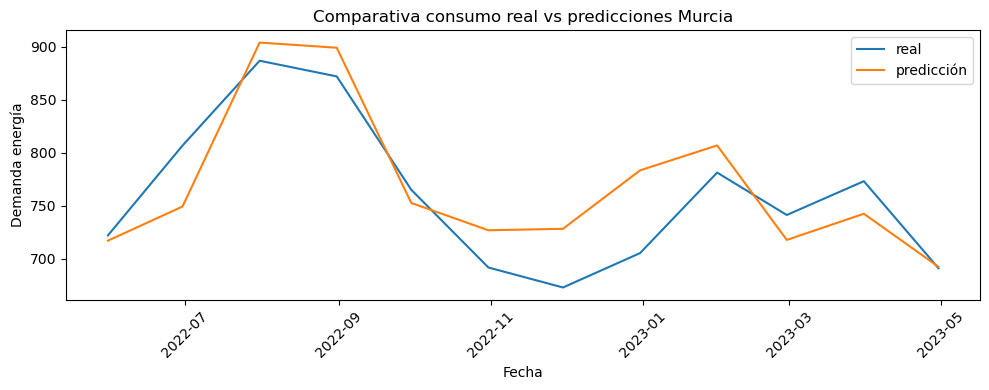

In [10]:
for comunidad in df.columns:
    plt.figure(figsize=(10, 4))
    
    plt.plot(datos_test.index, datos_test[comunidad], label="real")
    plt.plot(predicciones.index, predicciones[comunidad], label="predicción")

    plt.xlabel('Fecha')
    plt.ylabel('Demanda energía')
    plt.title(f'Comparativa consumo real vs predicciones {comunidad}')
    plt.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()

In [11]:
for comunidad in df.columns:
    error_mae = mean_absolute_error(y_true = datos_test[comunidad], y_pred = predicciones[comunidad])

    print(f"Test error (mae) {comunidad}: {error_mae}")

Test error (mae) Andalucia: 103.77045833333348
Test error (mae) Aragon: 56.602916666666665
Test error (mae) Cantabria: 22.48775000000003
Test error (mae) Castilla-La Mancha: 39.79558333333332
Test error (mae) Castilla-Leon: 38.03599999999998
Test error (mae) Cataluña: 347.5252083333333
Test error (mae) Pais Vasco: 60.02420833333321
Test error (mae) Asturias: 25.93779166666667
Test error (mae) Ceuta: 0.8105416666666666
Test error (mae) Melilla: 1.0321250000000004
Test error (mae) Madrid: 98.60129166666668
Test error (mae) Navarra: 14.567791666666631
Test error (mae) Valencia: 86.95433333333322
Test error (mae) Extremadura: 29.88679166666663
Test error (mae) Galicia: 223.69416666666658
Test error (mae) Baleares: 38.78404166666667
Test error (mae) Canarias: 27.266041666666695
Test error (mae) La Rioja: 4.134791666666685
Test error (mae) Murcia: 30.76487499999999


In [12]:
for comunidad in df.columns:
    R2 = r2_score(y_true = datos_test[comunidad], y_pred = predicciones[comunidad])

    print(f"Test error (R2) {comunidad}: {R2}")

Test error (R2) Andalucia: 0.7600154644962672
Test error (R2) Aragon: -0.2709444443150193
Test error (R2) Cantabria: -1.0130032131644686
Test error (R2) Castilla-La Mancha: 0.7275622164453575
Test error (R2) Castilla-Leon: 0.35698745794165987
Test error (R2) Cataluña: -0.2478401199118021
Test error (R2) Pais Vasco: 0.571719111872989
Test error (R2) Asturias: -0.7352811952041731
Test error (R2) Ceuta: 0.06700731900818957
Test error (R2) Melilla: 0.6058280799929542
Test error (R2) Madrid: 0.7219310817877747
Test error (R2) Navarra: 0.21029372897726784
Test error (R2) Valencia: 0.7740651284375728
Test error (R2) Extremadura: 0.17777677708349593
Test error (R2) Galicia: -10.492432511549175
Test error (R2) Baleares: 0.8324360475893701
Test error (R2) Canarias: -0.3664236249630588
Test error (R2) La Rioja: 0.36913137520325623
Test error (R2) Murcia: 0.6796325145981734
